# № 1 
Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

In [39]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_blobs
from networkx import random_shell_graph
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import make_classification, load_breast_cancer, fetch_openml, load_diabetes, load_iris, fetch_california_housing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, f1_score
from sklearn.linear_model import Perceptron
import time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor


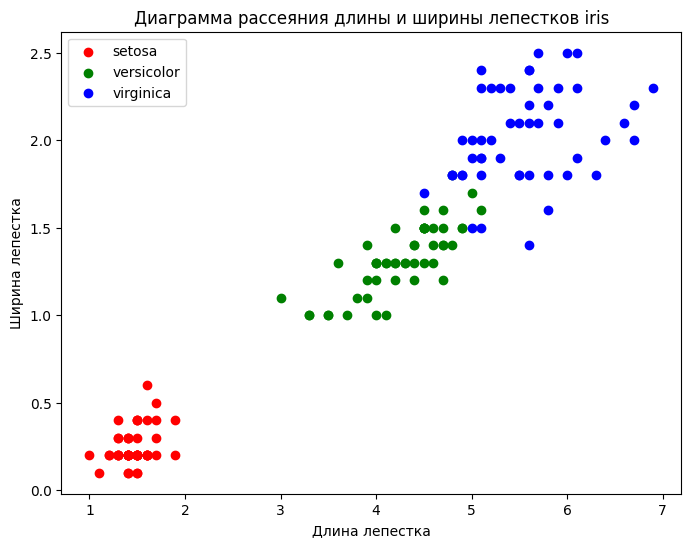

In [33]:
# Загрузка данных iris
iris = load_iris()
X = iris.data[:, 2:]  # Взятие последних двух столбцов (длина и ширина лепестков)
y = iris.target

# Создание диаграммы рассеяния
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(len(colors)):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, c=colors[i], label=iris.target_names[i])
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')
plt.legend()
plt.title('Диаграмма рассеяния длины и ширины лепестков iris')
plt.show()

# № 2
Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

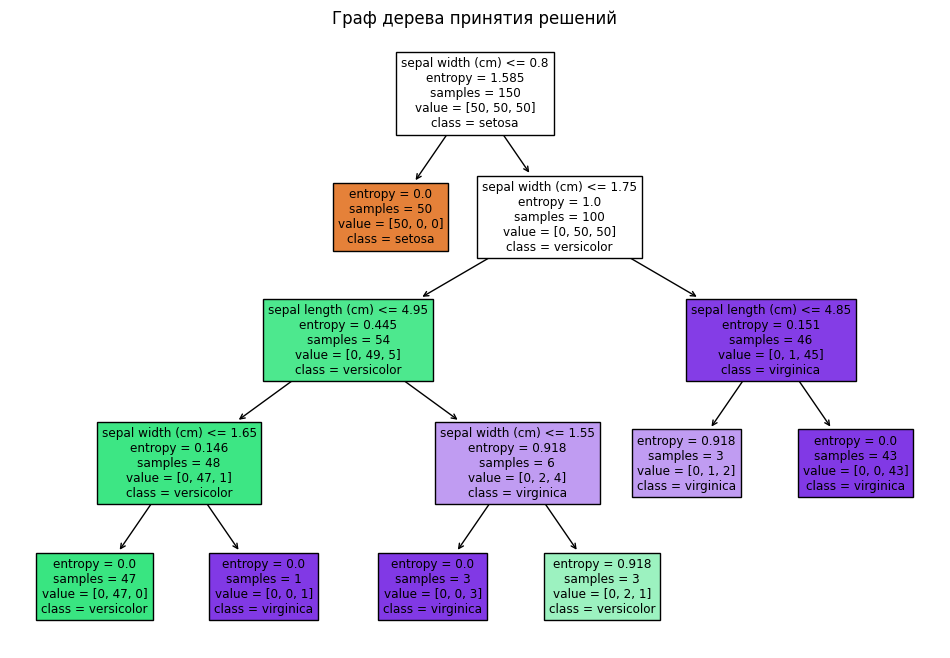

In [34]:
# Обучение модели дерева принятия решений
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf.fit(X, y)

# Визуализация графа дерева принятия решений
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Граф дерева принятия решений")
plt.show()

# № 3
Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

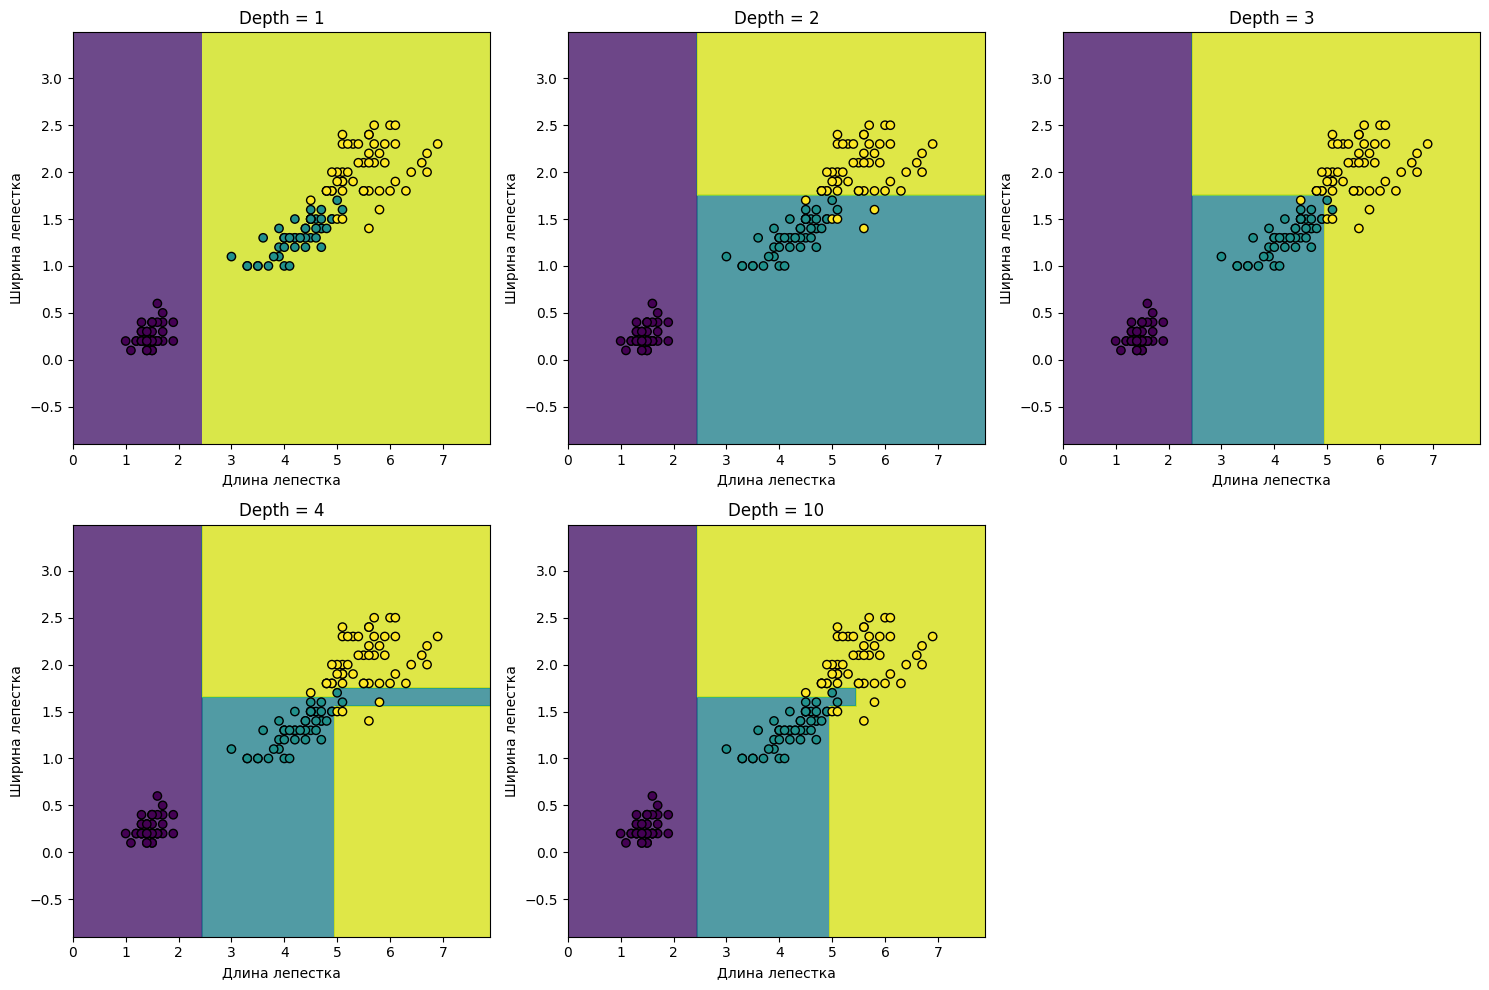

In [35]:
# Создание сетки для визуализации разделяющих областей
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Обучение и визуализация моделей с разными глубинами деревьев
depths = [1, 2, 3, 4, 10]
plt.figure(figsize=(15, 10))
for i, depth in enumerate(depths):
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X, y)

    plt.subplot(2, 3, i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(f'Depth = {depth}')
    plt.xlabel('Длина лепестка')
    plt.ylabel('Ширина лепестка')

plt.tight_layout()
plt.show()

# № 4
Выведите необходимые метрики для оценки работы моделей с разными глубинами. Сделайте вывод о том, какая модель лучше классифицирует данные.

In [36]:
depths = [1, 2, 3, 4, 10]
accuracies = []
f1_scores = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    clf.fit(X, y)
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred, average='weighted')
    accuracies.append(accuracy)
    f1_scores.append(f1)

    print(f"Depth: {depth}, Accuracy: {accuracy}, F1 Score: {f1}")

Depth: 1, Accuracy: 0.6666666666666666, F1 Score: 0.5555555555555555
Depth: 2, Accuracy: 0.96, F1 Score: 0.9599358974358975
Depth: 3, Accuracy: 0.9733333333333334, F1 Score: 0.9733226623982927
Depth: 4, Accuracy: 0.9866666666666667, F1 Score: 0.9866666666666667
Depth: 10, Accuracy: 0.9933333333333333, F1 Score: 0.9933326665999933


# № 5
Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

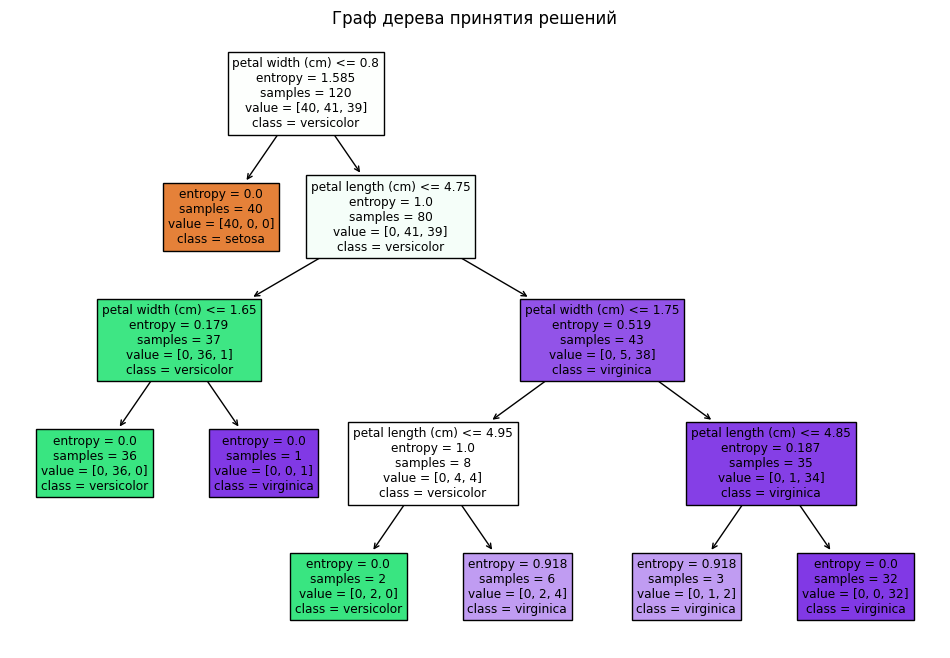

Точность модели: 1.0


In [37]:
# Загрузка данных iris
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели дерева принятия решений
clf = DecisionTreeClassifier(max_depth=4, criterion='entropy')
clf.fit(X_train, y_train)

# Визуализация графа дерева принятия решений
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Граф дерева принятия решений")
plt.show()

# Оценка качества работы модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy}")

# № 6
Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

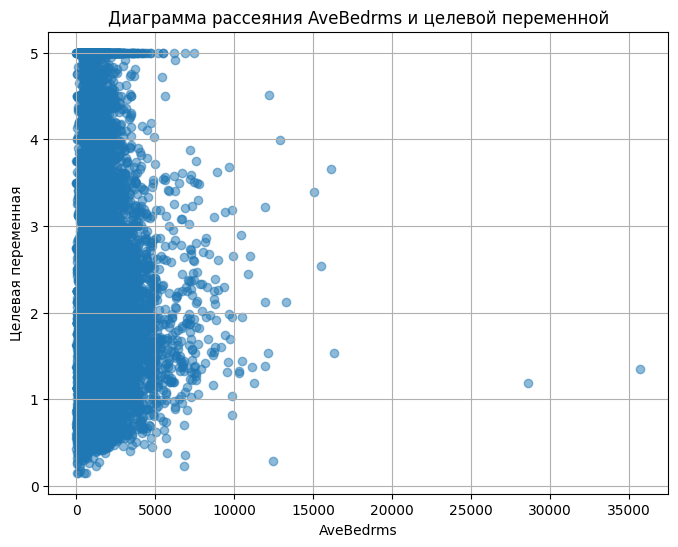

In [38]:
# Загрузка данных california_housing
california_housing = fetch_california_housing()
X = california_housing.data[:, 4].reshape(-1, 1)  # Используем только столбец AveBedrms
y = california_housing.target

# Изображение данных на диаграмме рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('AveBedrms')
plt.ylabel('Целевая переменная')
plt.title('Диаграмма рассеяния AveBedrms и целевой переменной')
plt.grid(True)
plt.show()

# № 7
Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [40]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели регрессионного дерева принятия решений
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Оценка качества модели на тестовом наборе данных
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 1.610142294407967


# № 8
Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

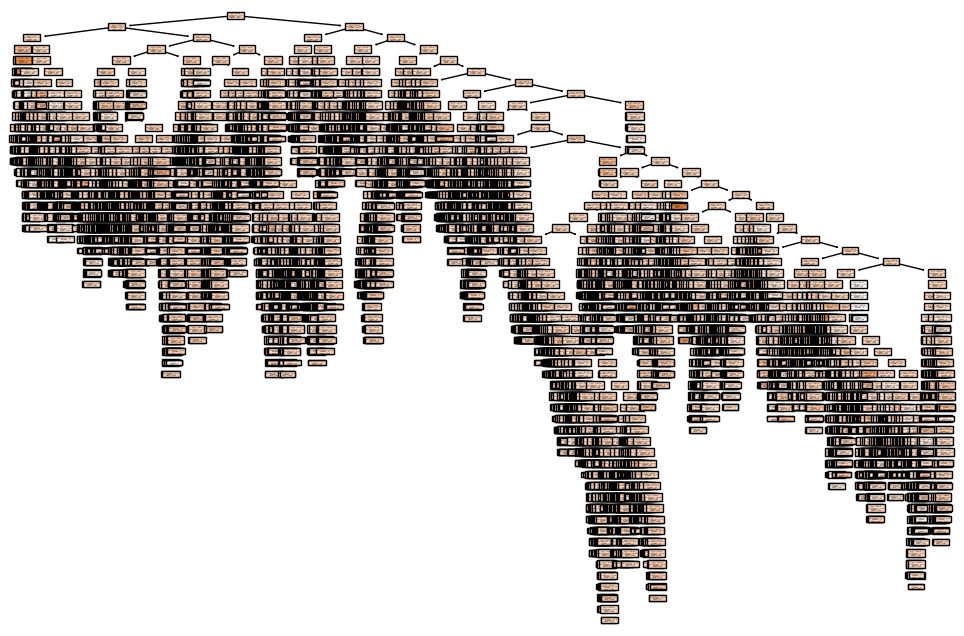

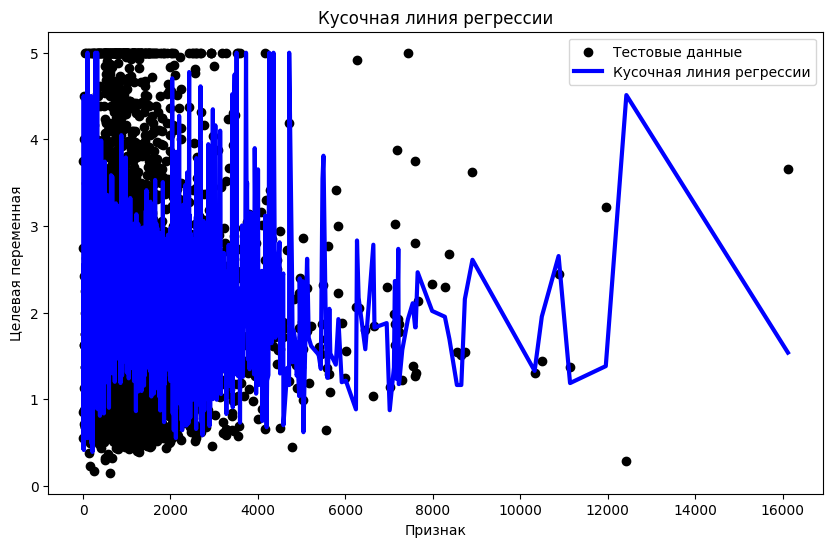

In [41]:
# Визуализация графа дерева решений
plt.figure(figsize=(12, 8))
plt.title("Граф регрессионного дерева принятия решений")
plot_tree(regressor, filled=True)
plt.show()

# Визуализация кусочной линии регрессии
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Тестовые данные')
plt.plot(np.sort(X_test, axis=0), regressor.predict(np.sort(X_test, axis=0)), color='blue', linewidth=3, label='Кусочная линия регрессии')
plt.xlabel('Признак')
plt.ylabel('Целевая переменная')
plt.title('Кусочная линия регрессии')
plt.legend()
plt.show()

# № 9
Оцените качество работы модели. Создайте новое наблюдение и сделайте предсказание на нём.

In [42]:
# Оценка качества работы модели
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")
print(f"Коэффициент детерминации: {r2}")

# Создание нового наблюдения
new_observation = [[4.5]]  # Пример нового наблюдения (значение признака AveBedrms)

# Предсказание на новом наблюдении
prediction = regressor.predict(new_observation)
print(f"Предсказание на новом наблюдении: {prediction}")

Среднеквадратичная ошибка: 1.610142294407967
Коэффициент детерминации: -0.22873264846630637
Предсказание на новом наблюдении: [2.75]


# № 10
Загрузите весь датасет fetch_california_housing. Обучите ту же модель. Визуализируйте соответствующий граф дерева решений и оцените качество работы модели.

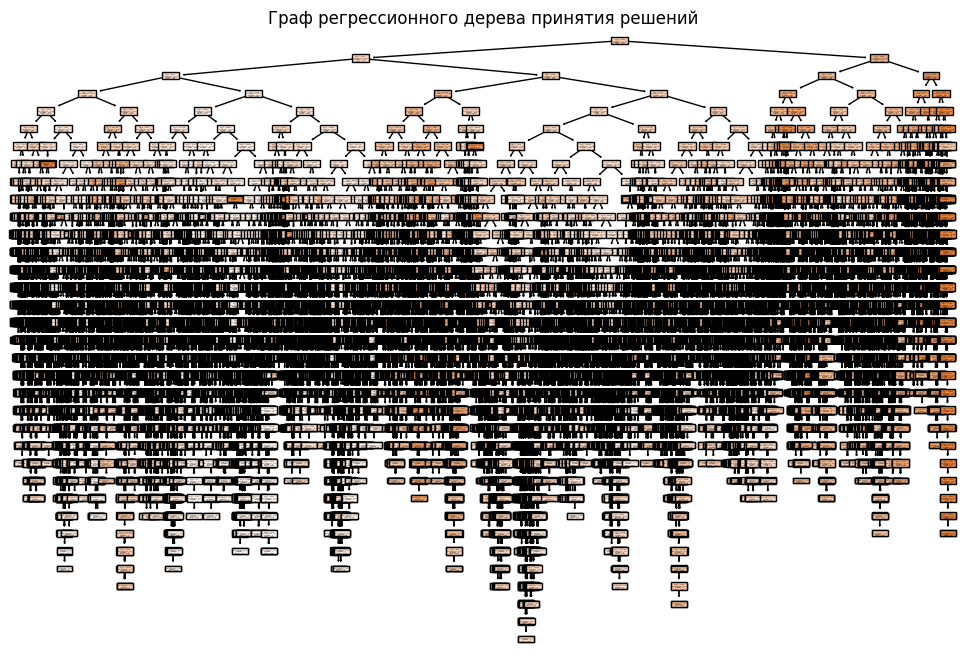

Среднеквадратичная ошибка: 0.5008492183132024
Коэффициент детерминации: 0.617791676774418


In [43]:
# Загрузка данных california_housing
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели регрессионного дерева принятия решений
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Визуализация графа дерева решений
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True)
plt.title("Граф регрессионного дерева принятия решений")
plt.show()

# Оценка качества работы модели
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")
print(f"Коэффициент детерминации: {r2}")